<a href="https://colab.research.google.com/github/ladrianx/SQL/blob/main/Simulaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Índice

1. [Movimiento Browniano](#movimiento-browniano)

  1.1. [Ejercicio 1](#ejercicio-1)

  1.2. [Ejercicio 2](#ejercicio-2)

  
2. [Movimiento Browniano Geométrico](#movimiento-browniano-geometrico)
  
  2.1. [Ejercicio 3](#ejercicio-3)

3. [Proceso de Ornstein-Uhlenbeck](#proceso-de-ornstein-uhlenbeck)

  3.1. [Ejercicio 4](#ejercicio-4)

4. [Integral de Ito](#integral-de-ito)

  4.1. [Ejercicio 5](#ejercicio-5)

  4.2. [Ejercicio 6](#ejercicio-6)
  
  4.3. [Ejercicio 7](#ejercicio-7)

## Movimiento Browniano

El movimiento browniano con deriva puede expresarse con la ecuación diferencial estocástica
$$
dX_t = \mu dt + \sigma dW_t
$$
donde:
* $ \mu $ es el coeficiente de deriva,
* $ \sigma $ es el coeficiente de volatilidad,
* $ dW_t $ es el incremento del movimiento Browniano.


Para deducir la fórmula del movimiento Browniano con deriva utilizando la fórmula de Itô dividimos el intervalo de tiempo $ [0, T] $ en $ N $ subintervalos de tamaño $ h = \frac{T}{N} $. En cada intervalo $ [t_i, t_{i+1}] $, el cambio en el proceso $ X_t $ es:

$$
X_{i+1} - X_i = \int_{t_i}^{t_{i+1}} \mu \, ds + \int_{t_i}^{t_{i+1}} \sigma \, dW_s
$$

Evaluando las integrales:

1. La integral de la deriva es:

$$
\int_{t_i}^{t_{i+1}} \mu \, ds = \mu \cdot (t_{i+1} - t_i) = \mu \cdot h
$$

2. La integral del movimiento Browniano es:

$$
\int_{t_i}^{t_{i+1}} \sigma \, dW_s = \sigma \cdot (W_{i+1} - W_i)
$$

Donde $ W_{i+1} - W_i \approx \sqrt{h} \cdot y_i $, con $ y_i \sim \mathcal{N}(0,1) $.

Sustituyendo estas integrales en la ecuación del cambio de $ X $:

$$
X_{i+1} - X_i = \mu \cdot h + \sigma \cdot \sqrt{h} \cdot y_i
$$

Por lo tanto, la fórmula del movimiento Browniano con deriva es:

$$
X^{h}(t_{i+1}) = X^{h}(t_i) + \mu \cdot h + \sigma \cdot \sqrt{h} \cdot y_i
$$

donde $ y_i \sim \mathcal{N}(0,1) $.

### Ejercicio 1

A continuación generamos una posible trayectoria que puede seguir un browniano en diez días si $h = 1, 1/2, 1/4, 1/8, 1/16$. En este caso, suponemos que $T=10$, $\mu = 0$ y $\sigma = 1$

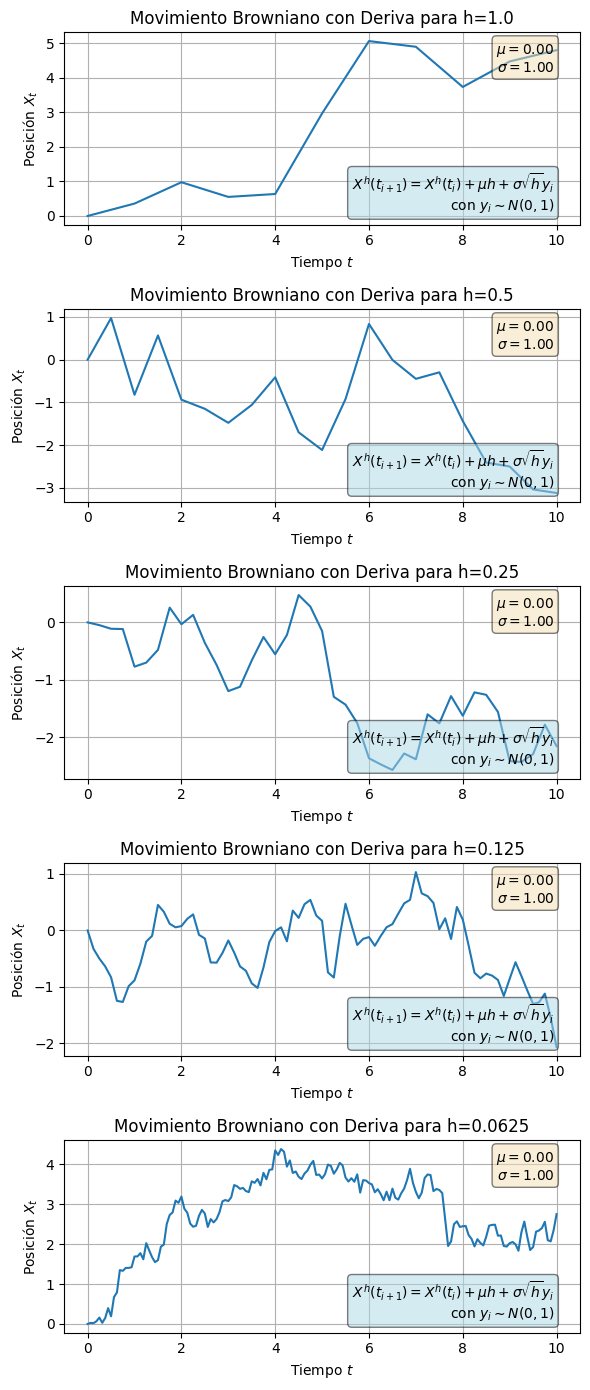

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
T = 10.0       # Tiempo total
Ns = [10, 20, 40, 80, 160]  # Lista de diferentes N para la simulación
mu = 0.0       # Deriva
sigma = 1.0    # Volatilidad

# Definimos la función que genera el movimiento browniano con deriva
def brownian_motion_with_drift(N, T, mu, sigma):
    h = T / N     # Tamaño del paso (h)
    t = np.linspace(0, T, N+1)  # Puntos de tiempo desde 0 hasta T
    X = np.zeros(N+1)           # Inicializamos el proceso en 0

    # Generamos los incrementos del movimiento browniano con deriva
    for i in range(1, N+1):
        y_i = np.random.normal(0, 1)  # y_i ~ N(0, 1)
        X[i] = X[i-1] + mu * h + sigma * np.sqrt(h) * y_i

    return t, X

# Crear un subplot para cada N en Ns
plt.figure(figsize=(6, 14))  # Ajustamos el tamaño de la figura
for idx, N in enumerate(Ns):
    t, X = brownian_motion_with_drift(N, T, mu, sigma)

    plt.subplot(len(Ns), 1, idx+1)  # Crear subplots en filas
    plt.plot(t, X)
    plt.title(f'Movimiento Browniano para h={T/N}')
    plt.xlabel('Tiempo $t$')
    plt.ylabel('Posición $X_t$')

    # Añadir un cuadro con los parámetros de la simulación (deriva y volatilidad)
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\sigma=%.2f$' % (sigma, )))

    # Añadir otro cuadro con la ecuación de la simulación
    equation_str = (r'$X^{h}(t_{i+1}) = X^{h}(t_i)+\mu h+\sigma\sqrt{h}y_i$'
                    '\n' r'con $y_i\sim {N}(0,1)$')

    # Configuraciones de los cuadros de texto
    props1 = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    props2 = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)

    # Colocamos el texto con los parámetros en la esquina superior derecha
    plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=props1)

    # Colocamos el texto con la ecuación en la esquina inferior derecha
    plt.text(0.95, 0.05, equation_str, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='bottom', horizontalalignment='right', bbox=props2)

    plt.grid(True)

# Ajustar los subplots para que no se solapen
plt.tight_layout()
plt.show()



### Ejercicio 2

Genere una posible trayectoria que puede seguir un browniano con tendencia $\mu = 0.5$ y volatilidad $0.1$ en diez días si $h = 1, 1/2, 1/4, 1/8, 1/16$.
Que observa al comparar el proceso anterior con éste.


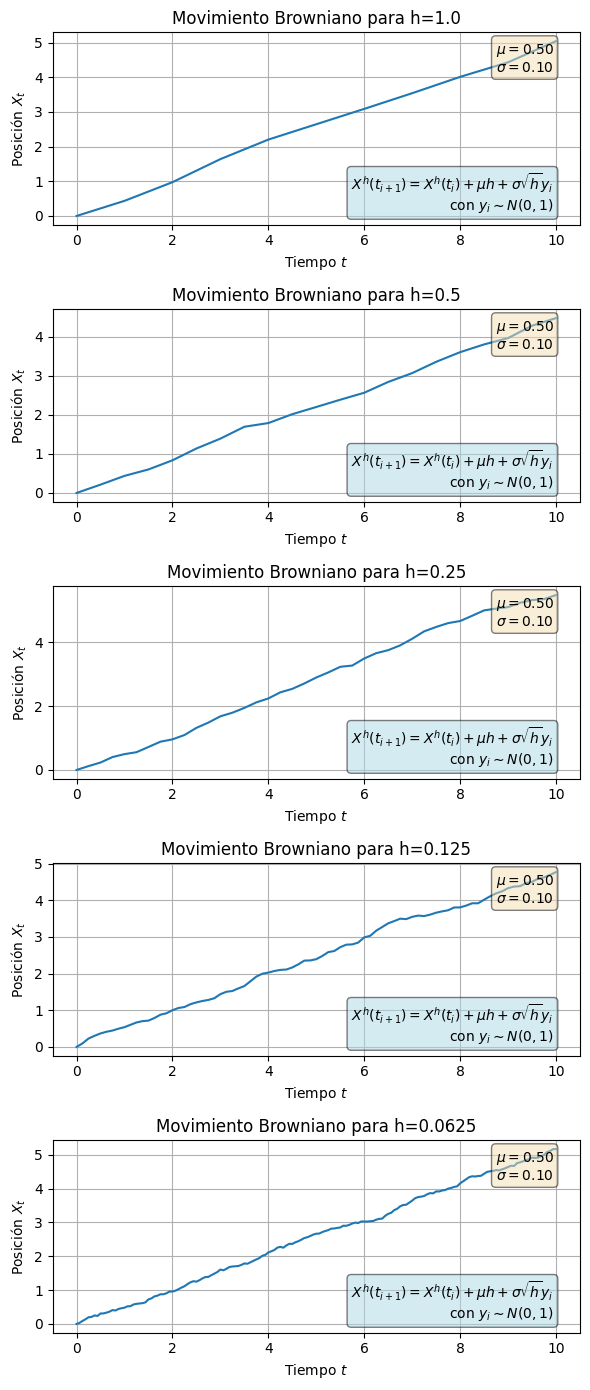

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
T = 10.0       # Tiempo total
Ns = [10, 20, 40, 80, 160]  # Lista de diferentes N para la simulación
mu = 0.5       # Deriva
sigma = 0.1    # Volatilidad

# Definimos la función que genera el movimiento browniano con deriva
def brownian_motion_with_drift(N, T, mu, sigma):
    h = T / N     # Tamaño del paso (h)
    t = np.linspace(0, T, N+1)  # Puntos de tiempo desde 0 hasta T
    X = np.zeros(N+1)           # Inicializamos el proceso en 0

    # Generamos los incrementos del movimiento browniano con deriva
    for i in range(1, N+1):
        y_i = np.random.normal(0, 1)  # y_i ~ N(0, 1)
        X[i] = X[i-1] + mu * h + sigma * np.sqrt(h) * y_i

    return t, X

# Crear un subplot para cada N en Ns
plt.figure(figsize=(6, 14))  # Ajustamos el tamaño de la figura
for idx, N in enumerate(Ns):
    t, X = brownian_motion_with_drift(N, T, mu, sigma)

    plt.subplot(len(Ns), 1, idx+1)  # Crear subplots en filas
    plt.plot(t, X)
    plt.title(f'Movimiento Browniano para h={T/N}')
    plt.xlabel('Tiempo $t$')
    plt.ylabel('Posición $X_t$')

    # Añadir un cuadro con los parámetros de la simulación (deriva y volatilidad)
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\sigma=%.2f$' % (sigma, )))

    # Añadir otro cuadro con la ecuación de la simulación
    equation_str = (r'$X^{h}(t_{i+1}) = X^{h}(t_i)+\mu h+\sigma\sqrt{h}y_i$'
                    '\n' r'con $y_i\sim {N}(0,1)$')

    # Configuraciones de los cuadros de texto
    props1 = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    props2 = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)

    # Colocamos el texto con los parámetros en la esquina superior derecha
    plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=props1)

    # Colocamos el texto con la ecuación en la esquina inferior derecha
    plt.text(0.95, 0.05, equation_str, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='bottom', horizontalalignment='right', bbox=props2)

    plt.grid(True)

# Ajustar los subplots para que no se solapen
plt.tight_layout()
plt.show()


## Movimiento Browniano Geométrico

Consideramos la ecuación diferencial estocástica (EDE) para el movimiento Browniano geométrico:

$$
dX_t = \mu X_t \, dt + \sigma X_t \, dW_t
$$

donde $ \mu $ es la deriva y $\sigma $ es la volatilidad. Queremos encontrar la solución para $ X_t $.

Multiplicamos ambos lados de la EDE por $ e^{-\mu t} $:

$$
e^{-\mu t} dX_t = e^{-\mu t} \mu X_t \, dt + e^{-\mu t} \sigma X_t \, dW_t
$$

Observamos que:

$$
e^{-\mu t} dX_t = d \left( e^{-\mu t} X_t \right) - X_t (-\mu e^{-\mu t}) \, dt
$$

Así que la integral se convierte en:

$$
d \left( e^{-\mu t} X_t \right) = e^{-\mu t} \sigma X_t \, dW_t
$$

Integramos ambos lados desde 0 hasta $ t $:

$$
e^{-\mu t} X_t - e^{-\mu 0} X_0 = \sigma \int_0^t e^{-\mu s} X_s \, dW_s
$$

Como $ e^{-\mu 0} = 1 $:

$$
e^{-\mu t} X_t = X_0 + \sigma \int_0^t e^{-\mu s} X_s \, dW_s
$$


Para resolver la integral estocástica, usamos la fórmula de Itô. La integral estocástica:

$$
\int_0^t e^{-\mu s} X_s \, dW_s
$$

es conocida y se puede expresar en términos de $ W_t $. Resolviendo esta integral y simplificando, obtenemos:

$$
e^{-\mu t} X_t = X_0 + \sigma \int_0^t e^{-\mu s} X_s \, dW_s
$$

La integral estocástica es proporcional a $ W_t $ y la solución general es:

$$
X_t = X_0 \exp \left( \left( \mu - \frac{1}{2} \sigma^2 \right) t + \sigma W_t \right)
$$

Para simular un movimiento Browniano geométrico en el intervalo $[0, T]$, dado $N \in \mathbb{N}$ y $h = \frac{T}{N}$:

* Inicializamos: $X^h(t_0) = X_0$
* Para $i = 1, \ldots, N$:
$$
  X^h(t_{i+1}) = X^h(t_i) \exp \left( \left( \mu - \frac{1}{2} \sigma^2 \right) h + \sigma \sqrt{h} \, y_i \right)
$$
donde $y_i \sim \mathcal{N}(0, 1)$.

### Ejercicio 3

Dados los datos del 1 de junio 2023 al 30 de noviembre del 2023 de Elektra y del Fix, estime la media y la varianza muestral. Con esos
datos genere una posible trayectoria que puede seguir el precio de estos
activos si suponemos que su dinámica está dada por un browniano
geométrico con valor inicial el 1 de diciembre 2023.

Media muestral: 0.0001878958069332703
Varianza muestral: 8.150650837844e-05


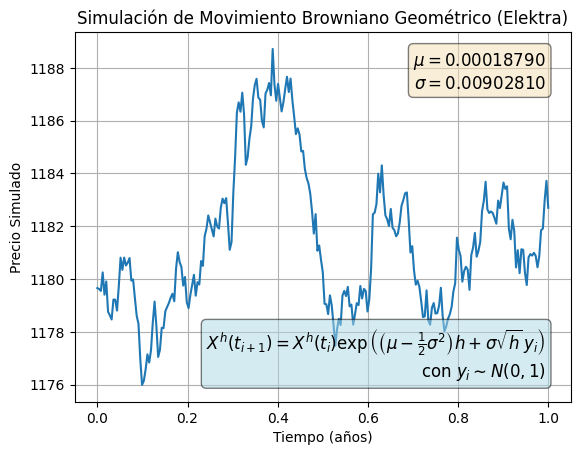

In [57]:
# Importamos librerías necesarias
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Importamos los datos de la acción correspondientes a 5 años
accion = 'ELEKTRA.MX'
periodo = '5Y'
accion = yf.Ticker(accion)
df_elektra = accion.history(period=periodo)

# Damos formato al índice usando la fecha
df_elektra.index = df_elektra.index.date

# Calculamos los rendimientos diarios
df_elektra['rendimientos_diarios'] = (df_elektra['Close'] - df_elektra['Close'].shift(1)) / df_elektra['Close'].shift(1)

# Convertir el índice a tipo datetime para facilitar la selección por fechas
df_elektra.index = pd.to_datetime(df_elektra.index)

# Seleccionar el periodo del 1 de junio 2023 al 30 de noviembre del 2023
df = df_elektra.loc['2023-06-01':'2023-11-30']

# Calcular la media y la varianza muestral de los rendimientos diarios
media_rendimientos = df['rendimientos_diarios'].mean()
varianza_rendimientos = df['rendimientos_diarios'].var()

print(f'Media muestral: {media_rendimientos}')
print(f'Varianza muestral: {varianza_rendimientos}')

# Supongamos que el precio de cierre del 1 de diciembre de 2023 es el valor inicial
S0 = df_elektra.loc['2023-11-30', 'Close']

# Parámetros de la simulación del GBM
T = 1.0       # Simulación de 1 año
N = 252       # Número de pasos (días hábiles en 1 año)
h = T / N     # Tamaño del paso
t = np.linspace(0, T, N+1)  # Tiempo desde 0 hasta T

# Usamos la media muestral con deriva (µ) y la desviación estándar como la volatilidad (σ)
mu = media_rendimientos
sigma = np.sqrt(varianza_rendimientos)

# Fijar la semilla para hacer la simulación reproducible
np.random.seed(21)

# Simulamos la trayectoria del GBM usando el método de Euler
S = np.zeros(N+1)
S[0] = S0

for i in range(1, N+1):
    y_i = np.random.normal(0, 1)  # Incremento browniano
    dW = np.sqrt(h) * y_i         # Incremento de Wiener
    S[i] = S[i-1] * np.exp((mu - 0.5 * sigma**2) * h + sigma * dW)

# Graficar la trayectoria simulada
plt.plot(t, S)
plt.title('Simulación de Movimiento Browniano Geométrico (Elektra)')
plt.xlabel('Tiempo (años)')
plt.ylabel('Precio Simulado')
plt.grid(True)

# Añadir un cuadro con los parámetros de la simulación (deriva y volatilidad)
textstr = '\n'.join((
    r'$\mu=%.8f$' % (mu, ),
    r'$\sigma=%.8f$' % (sigma, )))

# Añadir otro cuadro con la ecuación de la simulación
equation_str = (r'$X^h(t_{i+1}) = X^h(t_i) \exp \left( \left( \mu - \frac{1}{2} \sigma^2 \right) h + \sigma \sqrt{h} \, y_i \right)$'
                '\n' r'con $y_i\sim {N}(0,1)$')

# Configuraciones de los cuadros de texto
props1 = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props2 = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)

# Colocamos el texto con los parámetros en la esquina superior derecha
plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props1)

# Colocamos el texto con la ecuación en la esquina inferior derecha
plt.text(0.95, 0.05, equation_str, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='bottom', horizontalalignment='right', bbox=props2)

plt.grid(True)
plt.show()

Media muestral: -0.00013908218560617275
Varianza muestral: 4.817087842528274e-05


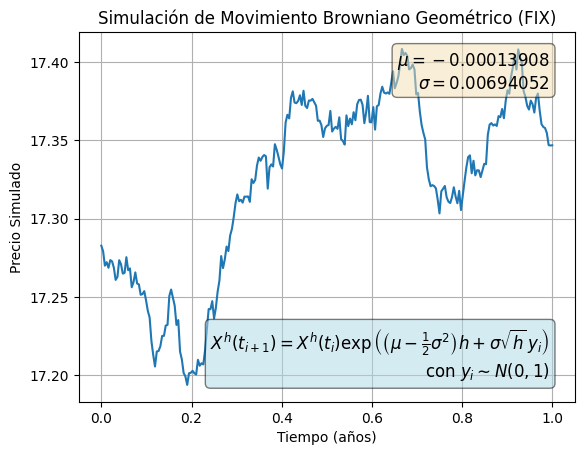

In [52]:
# Importamos librerías necesarias
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Intentar obtener los datos de la acción
accion = 'MXN=X'
periodo = '5Y'
accion = yf.Ticker(accion)
df_fix = accion.history(period=periodo)

# Verificar si se obtuvieron datos
if df_fix.empty:
    print(f"No se encontraron datos para {accion}. Es posible que el ticker no esté disponible o esté delisted.")
else:
    # Convertir el índice a tipo datetime para facilitar la selección por fechas
    df_fix.index = pd.to_datetime(df_fix.index)

    # Calculamos los rendimientos diarios
    df_fix['rendimientos_diarios'] = (df_fix['Close'] - df_fix['Close'].shift(1)) / df_fix['Close'].shift(1)

    # Seleccionar el periodo del 1 de junio 2023 al 30 de noviembre del 2023
    df = df_fix.loc['2023-06-01':'2023-11-30']

    # Calcular la media y la varianza muestral de los rendimientos diarios
    media_rendimientos = df['rendimientos_diarios'].mean()
    varianza_rendimientos = df['rendimientos_diarios'].var()

    print(f'Media muestral: {media_rendimientos}')
    print(f'Varianza muestral: {varianza_rendimientos}')

    # Supongamos que el precio de cierre del 1 de diciembre de 2023 es el valor inicial
    S0 = df_fix.loc['2023-11-30', 'Close']

    # Parámetros de la simulación del GBM
    T = 1.0       # Simulación de 1 año
    N = 252       # Número de pasos (días hábiles en 1 año)
    h = T / N     # Tamaño del paso
    t = np.linspace(0, T, N+1)  # Tiempo desde 0 hasta T

    # Usamos la media muestral como el drift (µ) y la desviación estándar como la volatilidad (σ)
    mu = media_rendimientos
    sigma = np.sqrt(varianza_rendimientos)

    # Simulamos la trayectoria del GBM usando el método de Euler-Maruyama
    S = np.zeros(N+1)
    S[0] = S0

    for i in range(1, N+1):
        y_i = np.random.normal(0, 1)  # Incremento browniano
        dW = np.sqrt(h) * y_i         # Incremento de Wiener
        S[i] = S[i-1] * np.exp((mu - 0.5 * sigma**2) * h + sigma * dW)

    # Graficar la trayectoria simulada
    plt.plot(t, S)
    plt.title('Simulación de Movimiento Browniano Geométrico (FIX)')
    plt.xlabel('Tiempo (años)')
    plt.ylabel('Precio Simulado')
    plt.grid(True)

   # Añadir un cuadro con los parámetros de la simulación (deriva y volatilidad)
textstr = '\n'.join((
    r'$\mu=%.8f$' % (mu, ),
    r'$\sigma=%.8f$' % (sigma, )))

# Añadir otro cuadro con la ecuación de la simulación
equation_str = (r'$X^h(t_{i+1}) = X^h(t_i) \exp \left( \left( \mu - \frac{1}{2} \sigma^2 \right) h + \sigma \sqrt{h} \, y_i \right)$'
                '\n' r'con $y_i\sim {N}(0,1)$')

# Configuraciones de los cuadros de texto
props1 = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props2 = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)

# Colocamos el texto con los parámetros en la esquina superior derecha
plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props1)

# Colocamos el texto con la ecuación en la esquina inferior derecha
plt.text(0.95, 0.05, equation_str, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='bottom', horizontalalignment='right', bbox=props2)

plt.grid(True)
plt.show()


Ahora aproximamos la ecuación diferencial estocástica usando el método de Euler. Para un pequeño incremento de tiempo $h$ tenemos que
$$
X^h(t_{i+1}) = X^h(t_i) +\mu h X^h(t_i) + \sqrt{h}\sigma X^h(t_i)y_i
$$
donde $y_i \sim \mathcal{N}(0, 1)$.

Veamos que en el caso de Elektra tenemos el mismo resultado.

Media muestral: -0.00013908218560617275
Varianza muestral: 4.817087842528274e-05


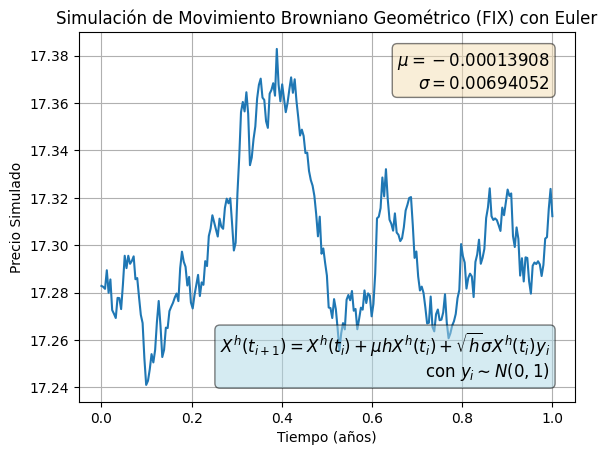

In [62]:
# Importamos librerías necesarias
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Intentar obtener los datos de la acción (reemplaza con otro ticker válido si FIX no está disponible)
accion = 'MXN=X'  # Cambiar por otro ticker válido si es necesario
periodo = '5Y'
accion = yf.Ticker(accion)
df_fix = accion.history(period=periodo)

# Verificar si se obtuvieron datos
if df_fix.empty:
    print(f"No se encontraron datos para {accion}. Es posible que el ticker no esté disponible o esté delisted.")
else:
    # Convertir el índice a tipo datetime para facilitar la selección por fechas
    df_fix.index = pd.to_datetime(df_fix.index)

    # Calculamos los rendimientos diarios
    df_fix['rendimientos_diarios'] = (df_fix['Close'] - df_fix['Close'].shift(1)) / df_fix['Close'].shift(1)

    # Seleccionar el periodo del 1 de junio 2023 al 30 de noviembre del 2023
    df = df_fix.loc['2023-06-01':'2023-11-30']

    # Calcular la media y la varianza muestral de los rendimientos diarios
    media_rendimientos = df['rendimientos_diarios'].mean()
    varianza_rendimientos = df['rendimientos_diarios'].var()

    print(f'Media muestral: {media_rendimientos}')
    print(f'Varianza muestral: {varianza_rendimientos}')

    # Supongamos que el precio de cierre del 1 de diciembre de 2023 es el valor inicial
    S0 = df_fix.loc['2023-11-30', 'Close']

    # Parámetros de la simulación del GBM
    T = 1.0       # Simulación de 1 año
    N = 252       # Número de pasos (días hábiles en 1 año)
    h = T / N     # Tamaño del paso
    t = np.linspace(0, T, N+1)  # Tiempo desde 0 hasta T

    # Usamos la media muestral como el drift (µ) y la desviación estándar como la volatilidad (σ)
    mu = media_rendimientos
    sigma = np.sqrt(varianza_rendimientos)

    # Fijar la semilla para hacer la simulación reproducible
    np.random.seed(21)

    # Simulamos la trayectoria del GBM usando el método de Euler-Maruyama ajustado
    S = np.zeros(N+1)
    S[0] = S0

    for i in range(1, N+1):
        y_i = np.random.normal(0, 1)         # y_i ~ N(0, 1)
        dW = np.sqrt(h) * y_i                # Incremento browniano ajustado
        S[i] = S[i-1] + mu * S[i-1] * h + sigma * S[i-1] * dW  # Método de Euler-Maruyama ajustado

    # Graficar la trayectoria simulada
    plt.plot(t, S)
    plt.title('Simulación de Movimiento Browniano Geométrico (FIX) con Euler')
    plt.xlabel('Tiempo (años)')
    plt.ylabel('Precio Simulado')
    plt.grid(True)

    # Añadir un cuadro con los parámetros de la simulación (deriva y volatilidad)
    textstr = '\n'.join((
    r'$\mu=%.8f$' % (mu, ),
    r'$\sigma=%.8f$' % (sigma, )))

# Añadir otro cuadro con la ecuación de la simulación
equation_str = (r'$X^h(t_{i+1}) = X^h(t_i) +\mu h X^h(t_i) + \sqrt{h}\sigma X^h(t_i)y_i$'
                '\n' r'con $y_i\sim {N}(0,1)$')

# Configuraciones de los cuadros de texto
props1 = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props2 = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)

# Colocamos el texto con los parámetros en la esquina superior derecha
plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props1)

# Colocamos el texto con la ecuación en la esquina inferior derecha
plt.text(0.95, 0.05, equation_str, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='bottom', horizontalalignment='right', bbox=props2)

plt.grid(True)
plt.show()


## Proceso de Ornstein-Uhlenbeck

Consideramos la ecuación diferencial estocástica (EDE) del Proceso de Ornstein-Uhlenbeck:

$$
dX_t = -c X_t \, dt + \sigma \, dW_t
$$

donde:
* $X_t$ es el proceso a modelar,
* $c > 0$ es el coeficiente de velocidad de reversión,
* $\sigma$ es la volatilidad, y
* $W_t$ es el movimiento Browniano estándar.

Aplicamos la fórmula de Itô:

$$
df(X_t, t) = \frac{\partial f}{\partial t} dt + \frac{\partial f}{\partial X_t} dX_t + \frac{1}{2} \frac{\partial^2 f}{\partial X_t^2} (dX_t)^2
$$

Para resolver esta EDE, utilizamos el método del factor integrante. Multiplicamos ambos lados de la ecuación por $e^{ct}$

$$
e^{ct} \, dX_t = e^{ct} \, (-c X_t \, dt + \sigma \, dW_t)
$$

Lo que simplifica a

$$
d(e^{ct} X_t) = \sigma e^{ct} \, dW_t
$$

A continuación, integramos ambos lados desde $t_0$ hasta $t$

$$
e^{ct} X_t = X_0 + \sigma \int_0^t e^{cs} \, dW_s
$$

Multiplicando por $e^{-ct}$ para despejar $X_t$

$$
X_t = X_0 e^{-ct} + \sigma e^{-ct} \int_0^t e^{cs} \, dW_s
$$
de donde obtenmos
$$
X_t = X_0 e^{-ct} + \sigma \int_0^t e^{-c(t-s)} \, dW_s
$$

Esta es la solución de la EDE de Ornstein-Uhlenbeck.

A continuación hacemos una simulación del proceso usando el método de Euler

### Ejercicio 4

Para ganar intuición en el proceso de Ornstein-Uhlenbeck genere dos trayectorias del proceso cuando $S_0 = 2$ o $0$ para los parámetros $\mu = 1$ y $\sigma = 0.3$.

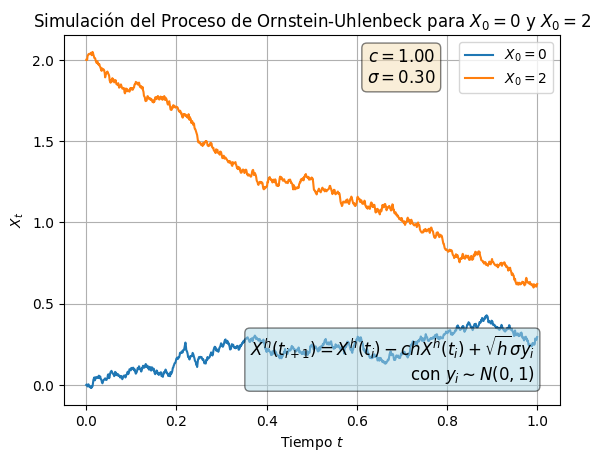

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
T = 1.0         # Tiempo total
N = 1000        # Número de pasos
h = T / N       # Tamaño del paso
t = np.linspace(0, T, N+1)  # Puntos de tiempo desde 0 hasta T

# Parámetros del Proceso de Ornstein-Uhlenbeck
c = 1.0         # Velocidad de reversión
sigma = 0.3     # Volatilidad

# Inicializamos el proceso para dos valores iniciales X0 = 0 y X0 = 2
X0_values = [0, 2]
np.random.seed(9999)  # Semilla para reproducibilidad

# Simulación del proceso para cada X0
for X0 in X0_values:
    X = np.zeros(N+1)
    X[0] = X0

    # Simulación del proceso usando el método de Euler
    for i in range(1, N+1):
        y_i = np.random.normal(0, 1)        # y_i ~ N(0, 1)
        dW = np.sqrt(h) * y_i               # Incremento browniano
        X[i] = X[i-1] + -c * X[i-1] * h + sigma * dW

    # Graficar el camino simulado del Proceso de Ornstein-Uhlenbeck
    plt.plot(t, X, label=f'$X_0={X0}$')

# Configuración del gráfico
plt.title('Simulación del Proceso de Ornstein-Uhlenbeck para $X_0=0$ y $X_0=2$')
plt.xlabel('Tiempo $t$')
plt.ylabel('$X_t$')
plt.legend(loc='upper right')
plt.grid(True)

# Añadir cuadro con los parámetros de la simulación
textstr = '\n'.join((
    r'$c=%.2f$' % (c, ),
    r'$\sigma=%.2f$' % (sigma, )))

# Añadir otro cuadro con la ecuación de la simulación
equation_str = (r'$X^h(t_{i+1}) = X^h(t_i) -c h X^h(t_{i}) + \sqrt{h}\sigma y_i$'
                '\n' r'con $y_i\sim {N}(0,1)$')

# Configuraciones de los cuadros de texto
props1 = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props2 = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)

# Colocamos el texto con los parámetros en la esquina superior derecha
plt.text(0.75, 0.965, textstr, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props1)

# Colocamos el texto con la ecuación en la esquina inferior derecha
plt.text(0.95, 0.05, equation_str, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='bottom', horizontalalignment='right', bbox=props2)

plt.show()

## Integral de Itô

## Ejercicio 5

Calcular el valor esperado de la integral estocástica

$$ \mathbb{E} \left( \int_0^{2\pi} W_s \, dW_s \right), $$

donde $W_s$ es un movimiento Browniano estándar.


Usamos una propiedad importante de la integral de Itô

$$ \mathbb{E} \left( \int_0^T W_s \, dW_s \right) = \frac{1}{2} \mathbb{E}(W_T^2) - \frac{1}{2} \mathbb{E}(W_0^2). $$

Sabemos que $ W_0 = 0 $ y que $ W_T \sim \mathcal{N}(0, T) $, entonces $ \mathbb{E}(W_T^2) = T $ y $ \mathbb{E}(W_0^2) = 0 $.


Para $ T = 2\pi $, tenemos

$$ \mathbb{E} \left( \int_0^{2\pi} W_s \, dW_s \right) = \frac{1}{2} \mathbb{E}(W_{2\pi}^2) - \frac{1}{2} \mathbb{E}(W_0^2), $$

donde $ \mathbb{E}(W_{2\pi}^2) = 2\pi $ y $ \mathbb{E}(W_0^2) = 0 $. Entonces

$$ \mathbb{E} \left( \int_0^{2\pi} W_s \, dW_s \right) = \frac{1}{2} \cdot 2\pi = \pi. $$

Por lo tanto, el valor esperado es

$$ \mathbb{E} \left( \int_0^{2\pi} W_s \, dW_s \right) = \pi. $$

## Ejercicio 6

Encontrar la dinámica del proceso $Y_t = \sin(W_t)$

Para encontrar la dinámica del proceso $Y_t = \sin(W_t)$, donde $W_t$ es un movimiento browniano estándar, utilizamos el teorema de Itô. Primero, calculemos las derivadas de $f(x) = \sin(x)$:

$$
f'(x) = \cos(x)
$$

$$
f''(x) = -\sin(x)
$$

Aplicando el teorema de Itô

$$
dY_t = f'(W_t) \, dW_t + \frac{1}{2} f''(W_t) \, dt
$$

Sustituyendo $f'(W_t) = \cos(W_t)$ y $f''(W_t) = -\sin(W_t)$:

$$
dY_t = \cos(W_t) \, dW_t + \frac{1}{2} (-\sin(W_t)) \, dt
$$

Simplificando

$$
dY_t = \cos(W_t) \, dW_t - \frac{1}{2} \sin(W_t) \, dt
$$

Por lo tanto, la dinámica del proceso $Y_t = \sin(W_t)$ es

$$
dY_t = \cos(W_t) \, dW_t - \frac{1}{2} \sin(W_t) \, dt
$$

## Ejercicio 7

Calcular la dinámica de $X_t$, donde $X_t = 2 + t + e^{Y_t}$ y $Y_t$ sigue un movimiento browniano geométrico dado por $dY_t = \mu Y_t \, dt + \sigma Y_t \, dW_t$

Para calcular la dinámica de $X_t$, donde $X_t = 2 + t + e^{Y_t}$ y $Y_t$ sigue un movimiento browniano geométrico dado por $dY_t = \mu Y_t \, dt + \sigma Y_t \, dW_t$, utilizaremos la fórmula de Itô.

Primero, recordamos que para una función $g(Y_t)$, la fórmula de Itô es:

$$
dg(Y_t) = g'(Y_t) \, dY_t + \frac{1}{2} g''(Y_t) \, (dY_t)^2
$$

Para el proceso $X_t = 2 + t + e^{Y_t}$, calculamos los diferenciales de cada término:

1. Para el término constante $2$:
   $$
   d(2) = 0
   $$

2. Para el término lineal $t$:
   $$
   d(t) = dt
   $$

3. Para el término exponencial $e^{Y_t}$ aplicamos la fórmula de Itô a $g(Y_t) = e^{Y_t}$:
   - La primera derivada es $g'(Y_t) = e^{Y_t}$.
   - La segunda derivada es $g''(Y_t) = e^{Y_t}$.

   Entonces
   $$
   d(e^{Y_t}) = e^{Y_t} \, dY_t + \frac{1}{2} e^{Y_t} \, (dY_t)^2
   $$

   Sabemos que
   $$
   (dY_t)^2 = (\sigma Y_t \, dW_t)^2 = \sigma^2 Y_t^2 \, dt
   $$

   Por lo tanto
   $$
   d(e^{Y_t}) = e^{Y_t} (\mu Y_t \, dt + \sigma Y_t \, dW_t) + \frac{1}{2} e^{Y_t} \sigma^2 Y_t^2 \, dt
   $$

   Simplificando
   $$
   d(e^{Y_t}) = e^{Y_t} (\mu Y_t + \frac{1}{2} \sigma^2 Y_t^2) \, dt + e^{Y_t} \sigma Y_t \, dW_t
   $$

Finalmente, combinando todos los términos

$$
dX_t = d(2) + d(t) + d(e^{Y_t})
$$

$$
dX_t = 0 + dt + e^{Y_t} (\mu Y_t + \frac{1}{2} \sigma^2 Y_t^2) \, dt + e^{Y_t} \sigma Y_t \, dW_t
$$

Simplificando

$$
dX_t = \left(1 + e^{Y_t} (\mu Y_t + \frac{1}{2} \sigma^2 Y_t^2)\right) \, dt + e^{Y_t} \sigma Y_t \, dW_t
$$

Por lo tanto, la dinámica de $X_t = 2 + t + e^{Y_t}$ es

$$
dX_t = \left(1 + e^{Y_t} (\mu Y_t + \frac{1}{2} \sigma^2 Y_t^2)\right) \, dt + e^{Y_t} \sigma Y_t \, dW_t
$$